# Group 21  - Chess Piece Classification
## Deep Learning Project


|      |     Student Name     |     Student Email    | 
|---   |         ---          |           ---          |
| 1    |      Ana Miguel Sal       |20221645@novaims.unl.pt| 
| 2    |      David Castro      |          20220688@novaims.unl.pt    | 
| 3    |      Ehis Jegbefumwen        |20221015@novaims.unl.pt| 
| 4    |      Evans Onorieru|        20220657@novaims.unl.pt| 
| 5    |      Ricardo Montenegro      |20221359@novaims.unl.pt| 

### Data Source
https://www.kaggle.com/datasets/s4lman/chess-pieces-dataset-85x85

### Abstract

This file presents the data exploration of a zip folder with images of chess pieces. The dataset contains images of all chess pieces in (85x85) size. The images were taken from Chess.com from different board themes in order to cover all possibilities. The goal is to create an image classifier to classify every piece against each other taking into account their theme and shapes.
Having this in mind, the following steps will be now analyzed: Image dimensions, Number of images per class, Image distribution and Image quality. 

## 1. Imports

In [ ]:
import shutil
import time
import zipfile
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
import random

## 2. Load Images

In [ ]:
# Set the machine
gdrive = True
# Set the connection string
path = '/content/drive/MyDrive/NOVA IMS/DL/project/'
main_folder = "data/"
# If using Google Drive
if gdrive:
    # Setup drive
    from google.colab import drive
    drive.mount('/content/drive')        
    # Transfer zip dataset to the current virtual machine
    t0 = time.time()
    shutil.copyfile(path + 'archive.zip', 'archive.zip')
    # Extract files
    zip_ = zipfile.ZipFile('archive.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = ""

Mounted at /content/drive
File transfer completed in 1.523 seconds


## 3. Image dimensions

In [ ]:
#Check the size and dimensions of the images in the dataset.

# Set the directory path containing your images
directory_path1 = path + main_folder + 'bishop/'
directory_path2 = path + main_folder + 'king/'
directory_path3 = path + main_folder + 'knight/'
directory_path4 = path + main_folder + 'pawn/'
directory_path5 = path + main_folder + 'queen/'
directory_path6 = path + main_folder + 'rook/'

directory_path = [directory_path1, directory_path2, directory_path3, directory_path4, directory_path5, directory_path6]

# Initialize a variable to store the size of the first image
first_image_size = None

# Loop through all the image files in the directory
for directory in directory_path:  
  for filename in os.listdir(directory):
      if filename.endswith(".jpg") or filename.endswith(".png"):
          # Open the image using PIL
          image = Image.open(os.path.join(directory, filename))
          # Get the size of the image
          width, height = image.size
          #print(f"Image size of {filename}: {width}x{height}")

          # Check if this is the first image
          if first_image_size is None:
              first_image_size = (width, height)
          else:
              # Compare the size of this image with the first image
              if (width, height) != first_image_size:
                  print("Images are not all the same size!")
                  break
  else:
      print("All images are the same size!")
      print(f"Image size of {width}x{height}")


All images are the same size!
Image size of 85x85
All images are the same size!
Image size of 85x85
All images are the same size!
Image size of 85x85
All images are the same size!
Image size of 85x85
All images are the same size!
Image size of 85x85
All images are the same size!
Image size of 85x85


## 4. Number of images per class

In [ ]:
# Check the number of images per class in the dataset. 
# If some classes have significantly fewer images than others, it can lead to imbalanced training and negatively impact model performance...

# Set the path to the dataset directory
dataset_path = path + main_folder

# Get a list of subdirectories (i.e., class folders) in the dataset directory
subdirs = glob.glob(os.path.join(dataset_path, '*'))

# Loop through each subdirectory and count the number of images
for subdir in subdirs:
    num_images = len(os.listdir(subdir))
    print('Class {}: {} images'.format(os.path.basename(subdir), num_images))


Class pawn: 239 images
Class knight: 71 images
Class queen: 34 images
Class rook: 72 images
Class king: 34 images
Class bishop: 67 images


## 5. Image distribution

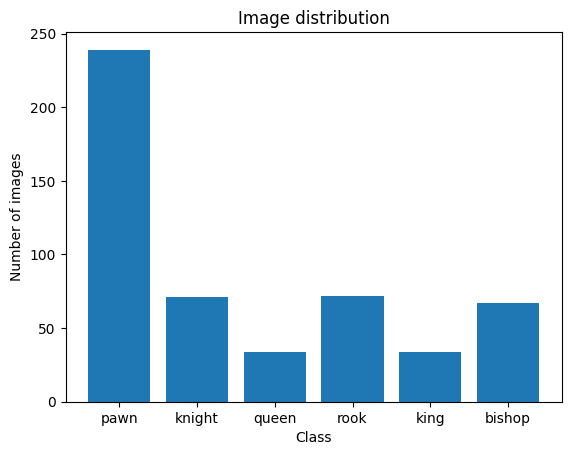

In [ ]:
# Plot the distribution of images across classes to check for class imbalance. A balanced dataset should have a roughly equal number of images per class.

# Count the number of images in each subdirectory (i.e., class folder)
num_images_per_class = [len(os.listdir(subdir)) for subdir in subdirs]

# Get the class names from the subdirectory names
class_names = [os.path.basename(subdir) for subdir in subdirs]

# Plot a bar chart of the number of images in each class
plt.bar(class_names, num_images_per_class)
plt.title('Image distribution')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()


## 6. Image quality

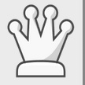

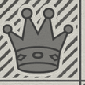

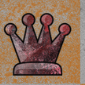

In [ ]:
# Check the quality of the images in the dataset. 
#Poor quality images, such as those that are blurry or have low resolution, can negatively impact model performance (not our case). 

# Choose a random subdirectory
subdir = random.choice(subdirs)

# Get a list of image files in the selected subdirectory
image_files = glob.glob(os.path.join(subdir, '*.png'))

# Choose three random images from the selected subdirectory
num_images_to_display = 3
sample_images = random.sample(image_files, num_images_to_display)

# Display each image in a window
for image_path in sample_images:
    image = Image.open(image_path)
    image.show()

